In [1]:
from pylab import *

## Constructing the Hermitian Matrix

Let $\mathbf{\Phi}$ be a sequence of $N$ real numbers, $(\phi_1, \, \phi_2, \, ...,\, \phi_N)$ where $\phi_k \in [-\pi, \pi)$

If $\mathbf{v}$ is a column vector of length $N$ where the $k$-th element is $e^{i \phi_k}$.

Thus, $M = \mathbf{v} \cdot \mathbf{\overline{v^T}}$ is a Hermitian Matrix,

$$
M = 
 \begin{pmatrix}
  1 & e^{i (\phi_1 - \phi_2)} & \cdots & e^{i (\phi_1 - \phi_N)} \\
  e^{i (\phi_2 - \phi_1)} & 1 & \cdots & e^{i (\phi_2 - \phi_N)} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  e^{i (\phi_N - \phi_1)} & e^{i (\phi_N - \phi_2)} & \cdots & 1 
 \end{pmatrix}
$$

$M$ has an eigenvector corresponding to an eigenvalue of $N$, which has the form $q \mathbf{v}$ where $q$ is a complex scalar. The goal is to determine $\mathbf{\Phi}$ (to within some constant phase rotation of all elements) given $M$. **So, really we are solving for the phase differences between adjacent elements.** Solving for the actual phases is not theoretically possible.

Solving for $\mathbf{\Phi}$ using the eigenvector is called the **eigenvector method**.

Another simpler method, called the **subdiagonal method** exploits our knowledge of the subdiagonals. By definition of $M$ we know that $ \angle M_{i+1,i} = \phi_{i+1} - \phi_i $. Thus, we can simply use the elements to the below the elements of the main diagonal as a direct measurement of the phase differences.

In practice, we get a noisy and incomplete measurement of $M$ with measured elements being those around the diagonal. As a first step, the goal is to solve for the eigenvector given a noiseless but incomplete Hermitian Matrix.

In [2]:
N = 5
phi = uniform(-pi, pi, N)
v = matrix(exp(1j * phi)).T
M = matmul(v, v.T.conj())
goal = angle(exp(1j*diff(phi)))
print("Input Phases:")
print(phi)
print("\nPhase differences to solve for:")
print(goal)
print("\nReal(M) = ")
print(M.real)
print("\nImag(M) = ")
print(M.imag)

Input Phases:
[ 2.10124123 -0.905519   -0.09464862 -1.9280351  -2.02193945]

Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Real(M) = 
[[ 1.         -0.99092387 -0.58517312 -0.63121028 -0.55570299]
 [-0.99092387  1.          0.68886777  0.52122031  0.43890161]
 [-0.58517312  0.68886777  1.         -0.25958278 -0.34899129]
 [-0.63121028  0.52122031 -0.25958278  1.          0.99559423]
 [-0.55570299  0.43890161 -0.34899129  0.99559423  1.        ]]

Imag(M) = 
[[ 0.          0.13442425  0.81090839 -0.77561174 -0.83138089]
 [-0.13442425  0.         -0.72488702  0.85342216  0.89853513]
 [-0.81090839  0.72488702  0.          0.96572086  0.93712597]
 [ 0.77561174 -0.85342216 -0.96572086  0.          0.0937664 ]
 [ 0.83138089 -0.89853513 -0.93712597 -0.0937664   0.        ]]


### Solving using Eigenvector Method

In [3]:
val, vec = eig(M)
x = vec[:, argmax(val)]
solution = angle(exp(1j*diff(angle(x.T.flatten()))))
print("Eigenvector solved for: ")
print(x)
print("\nPhase differences to solve for:")
print(goal)
print("\nPhase differences from eigenvector:")
print(solution.squeeze())

check = all(isclose(solution - goal, 0))
print("\nIs the solution correct?", check)

Eigenvector solved for: 
[[-0.44315463+0.06011635j]
 [ 0.44721360+0.j        ]
 [ 0.30807103+0.32417933j]
 [ 0.23309681-0.38166199j]
 [ 0.19628277-0.40183713j]]

Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Phase differences from eigenvector:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Is the solution correct? True


### Solving using subdiagonal method

You can just look at the elements below the main diagonal (the subdiagonal) 

In [4]:
print("Phases of the matrix M")
print(angle(M))

solution = angle(diag(M, -1))

print("\nPhase differences to solve for:")
print(goal)
print("\nPhase differences from subdiagonal:")
print(solution)

check = all(isclose(solution - goal, 0))
print("\nIs the solution correct?", check)

Phases of the matrix M
[[ 0.          3.00676023  2.19588986 -2.25390897 -2.16000463]
 [-3.00676023  0.         -0.81087038  1.0225161   1.11642045]
 [-2.19588986  0.81087038  0.          1.83338648  1.92729082]
 [ 2.25390897 -1.0225161  -1.83338648  0.          0.09390435]
 [ 2.16000463 -1.11642045 -1.92729082 -0.09390435  0.        ]]

Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Phase differences from subdiagonal:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Is the solution correct? True


**Eigenvector method is needlessly complicated for this scenario. The subdiagonal method is much cleaner.**

## Working with an incomplete matrix

In [5]:
# Delete elements to make it an incomplete matrix
for i in range(M.shape[1]):
    for j in range(M.shape[0]):
        if abs(i - j) > 1:
            M[i,j] = nan + 1j*nan

print("\nPhase differences to solve for:")
print(goal)
print("\nReal(M) = ")
print(M.real)
print("\nImag(M) = ")
print(M.imag)


Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Real(M) = 
[[ 1.         -0.99092387         nan         nan         nan]
 [-0.99092387  1.          0.68886777         nan         nan]
 [        nan  0.68886777  1.         -0.25958278         nan]
 [        nan         nan -0.25958278  1.          0.99559423]
 [        nan         nan         nan  0.99559423  1.        ]]

Imag(M) = 
[[ 0.          0.13442425         nan         nan         nan]
 [-0.13442425  0.         -0.72488702         nan         nan]
 [        nan  0.72488702  0.          0.96572086         nan]
 [        nan         nan -0.96572086  0.          0.0937664 ]
 [        nan         nan         nan -0.0937664   0.        ]]


### Eigenvector method

We can solve for the phase differences by individually solving the complete sub-matrices around the diagonal which are also Hermitian matrices.

In [6]:
# Function that solves for the phase differences
# in the eigenvector associated with the largest
# eigenvalue in matrix M
def solve_M(M):
    val, vec = eig(M)
    x = vec[:, argmax(abs(val))]
    solution = angle(exp(1j*diff(angle(x.T.flatten()))))
    return solution

solution = np.zeros(M.shape[0] - 1)
for i in range(M.shape[0] - 1):
    solution[i] = solve_M(M[i:i+2,i:i+2])
    
print("\nPhase differences from eigenvector method:")
print(solution)

check = all(isclose(solution - goal, 0))
print("\nIs the solution correct?", check)


Phase differences from eigenvector method:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Is the solution correct? True


### Off-diagonal method

In [7]:
solution = angle(diag(M, -1))
    
print("\nPhase differences from subdiagonal method:")
print(solution)

check = all(isclose(solution - goal, 0))
print("\nIs the solution correct?", check)


Phase differences from subdiagonal method:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Is the solution correct? True


## Working with an incomplete AND noisy matrix

This is what we'll be working with in practice anyway. The noise will make it impossible to solve for the exact phases, but that was always inevitable. We can possibly get some sort of noisy approximation of the actual phase differences.

In [8]:
# Adding 0.1 standard deviations normally-distributed noise to the matrix
M += normal(0, 0.1, M.shape) + normal(0, 0.1, M.shape)*1j
re = triu(M.real, k=1) + triu(M.real, k=1).T
im = triu(M.imag, k=1) - triu(M.imag, k=1).T
M = re + 1j*im

for i in range(M.shape[0]):
    M[i,i] = 1

print("\nPhase differences to solve for:")
print(goal)
print("\nReal(M) = ")
print(M.real)
print("\nImag(M) = ")
print(M.imag)


Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Real(M) = 
[[ 1.         -1.010731           nan         nan         nan]
 [-1.010731    1.          0.79207781         nan         nan]
 [        nan  0.79207781  1.         -0.43186305         nan]
 [        nan         nan -0.43186305  1.          0.95096812]
 [        nan         nan         nan  0.95096812  1.        ]]

Imag(M) = 
[[ 0.          0.14603705         nan         nan         nan]
 [-0.14603705  0.         -0.66356345         nan         nan]
 [        nan  0.66356345  0.          1.15951465         nan]
 [        nan         nan -1.15951465  0.          0.22338782]
 [        nan         nan         nan -0.22338782  0.        ]]


In [9]:
print("\nPhase differences to solve for:")
print(goal)

solution = np.zeros(M.shape[0] - 1)
for i in range(M.shape[0] - 1):
    solution[i] = solve_M(M[i:i+2,i:i+2])
print("\nPhase differences from eigenvector method:")
print(solution)

solution = angle(diag(M, -1))
print("\nPhase differences from subdiagonal method:")
print(solution)


Phase differences to solve for:
[-3.00676023  0.81087038 -1.83338648 -0.09390435]

Phase differences from eigenvector method:
[-2.99809913  0.69733937 -1.92733089 -0.23072258]

Phase differences from subdiagonal method:
[-2.99809913  0.69733937 -1.92733089 -0.23072258]


**With noise, it's hard to say if one of the methods is superior.** Speed and simplicity is less important than accuracy!

# Testing this further

## Functions for simplicity

In [10]:
# Creates a noisy and incomplete Hermitian Matrix.
# Returns matrix and the phase differences to be solved for.
# Incomplete is a positive integer denoting how many elements
# below and to the right of the diagonal are NOT missing.
# Noise is the standard deviation of Gaussian noise added to matrix.
def create_noisy_and_incomplete_M(N, incomplete, noise):
    # Input Phases
    phi = uniform(-pi, pi, N)
    
    # Phase differences to solve for
    goal = angle(exp(1j*diff(phi)))
    
    # Column vector v
    v = matrix(exp(1j * phi)).T
    
    # Hermitian Matrix M
    M = matmul(v, v.T.conj())
    
    # Add noise and make symmetric
    M += normal(0, 0.1, M.shape) + normal(0, noise, M.shape)*1j
    re = triu(M.real, k=1) + triu(M.real, k=1).T
    im = triu(M.imag, k=1) - triu(M.imag, k=1).T
    M = re + 1j*im

    for i in range(N):
        for j in range(N):
            if abs(i - j) > incomplete:
                M[i,j] = nan + 1j*nan
    
    for i in range(M.shape[0]):
        M[i,i] = 1
        
    return M, goal


## Eigenvector Method

In [11]:
# --------------------------
# --- Eigenvector Method ---
# --------------------------

# Solve for phase differences in given complete matrix
def eigen_solve_complete(M):
    val, vec = eig(M)
    x = vec[:, argmax(abs(val))]
    solution = angle(exp(1j*diff(angle(x.T.flatten()))))
    return solution

# Solve for phase differences given M
def eigen_solve_M(M):
    N = M.shape[0]
    
    # Determining the incomplete value of the matrix
    incomplete = sum(logical_not(isnan(M))[0]) - 1
    
    # Initializing phase difference array
    phase_difference = np.zeros(N - 1)
    phase_diff_count = np.zeros(N - 1)
    
    # Solving sub-matrices
    for i in range(N - incomplete):
        sol = eigen_solve_complete(M[i:i+incomplete+1, i:i+incomplete+1])
        phase_difference[i:i+incomplete] += sol.flatten()
        phase_diff_count[i:i+incomplete] += np.ones(incomplete)
    
    return phase_difference/phase_diff_count

# Testing the method

N = 5
incomplete = 2
noise = 0.1
test_M, test_goal = create_noisy_and_incomplete_M(N, incomplete, noise)
comp = sum(logical_not(isnan(test_M)))/N/N

print("Constructed {0}x{0} matrix, Completeness: {1:.2f}% (Noise: {2})".format(N, comp*100, noise))
print("\nReal(M) = ")
print(test_M.real)
print("\nImag(M) = ")
print(test_M.imag)

print("\nPhase differences to solve for:")
print(test_goal)

test_solution = eigen_solve_M(test_M)

print("\nSolved Phase differences:")
print(test_solution)

residuals = angle(exp(1j * (test_solution - test_goal)))
print("\n Residuals:")
print(residuals)

print("\nResidual Mean:", mean(residuals))
print("Residual Standard deviation:", std(residuals))
print("Max Residual:", np.max(abs(residuals)))

Constructed 5x5 matrix, Completeness: 76.00% (Noise: 0.1)

Real(M) = 
[[ 1.          0.19853617 -0.44461195         nan         nan]
 [ 0.19853617  1.          0.60255997  0.73022146         nan]
 [-0.44461195  0.60255997  1.          0.94025888 -0.65361481]
 [        nan  0.73022146  0.94025888  1.         -0.61340627]
 [        nan         nan -0.65361481 -0.61340627  1.        ]]

Imag(M) = 
[[ 0.          0.77793276  0.85158598         nan         nan]
 [-0.77793276  0.          0.86981666  0.79796782         nan]
 [-0.85158598 -0.86981666  0.         -0.10646995 -0.83339348]
 [        nan -0.79796782  0.10646995  0.         -1.0326374 ]
 [        nan         nan  0.83339348  1.0326374   0.        ]]

Phase differences to solve for:
[-1.17506253 -0.96948118  0.11409824  2.11291217]

Solved Phase differences:
[-1.22686729 -0.92877083  0.12006561  2.11138252]

 Residuals:
[-0.05180476  0.04071035  0.00596737 -0.00152965]

Residual Mean: -0.00166417477141
Residual Standard deviation: 

### Eigenvector method on larger matrices


Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.1)
Mean(Residuals): 0.000754383240771
Stdev(Residuals): 0.112988834456
Max(|Residuals|): 1.93005925999


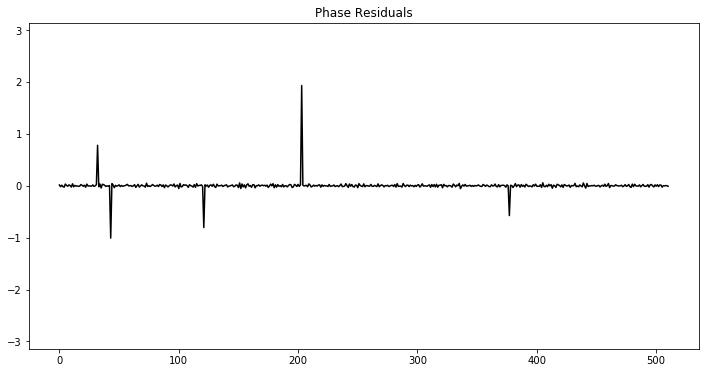

----------------------------

Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.5)
Mean(Residuals): 0.00758490642779
Stdev(Residuals): 0.218867281196
Max(|Residuals|): 2.74401481772


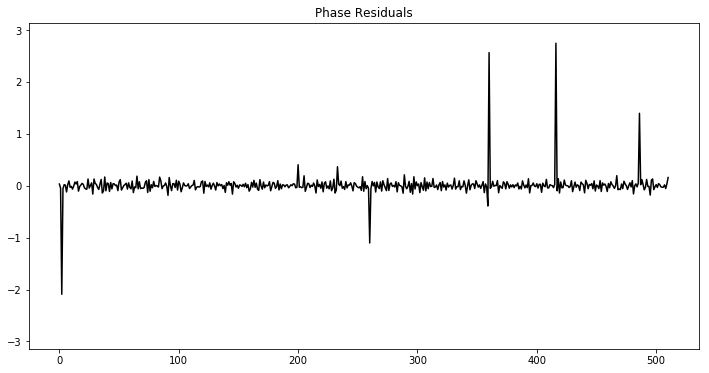

----------------------------

Constructed 512x512 matrix, Completeness: 23.61% (noise = 0.1)
Mean(Residuals): 0.00117986868302
Stdev(Residuals): 0.0710374896914
Max(|Residuals|): 1.36317344422


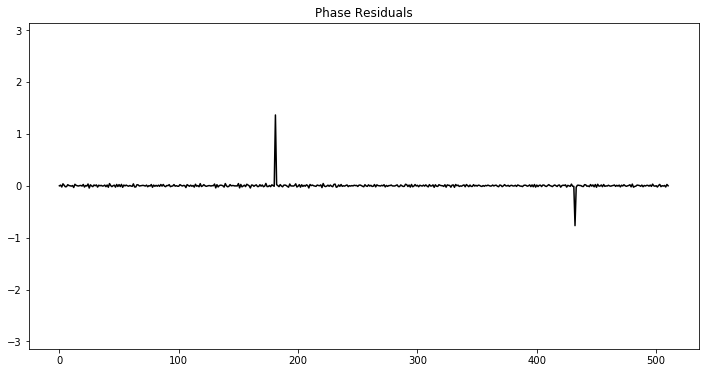

In [12]:
# Test Matrix sizes, and completeness factors
def test_solve(N, incomplete, noise):
    test_M, test_goal = create_noisy_and_incomplete_M(N, incomplete, noise)
    test_solution = eigen_solve_M(test_M)
    residuals = angle(exp(1j * (test_solution - test_goal)))
    comp = sum(logical_not(isnan(test_M)))/N/N
    print("\nConstructed {0}x{0} matrix, Completeness: {1:.2f}% (noise = {2})".format(N, comp*100, noise))
    print("Mean(Residuals):", mean(residuals))
    print("Stdev(Residuals):", std(residuals))
    print("Max(|Residuals|):", np.max(abs(residuals)))
    return residuals


res = test_solve(512, 32, 0.1)
figure(figsize=(12,6))
plot(res, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res = test_solve(512, 32, 0.5)
figure(figsize=(12,6))
plot(res, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res = test_solve(512, 64, 0.1)
figure(figsize=(12,6))
plot(res, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

### Why do those spikes occur?

There seem to be spikes in the residuals. Could this be because unlucky perturbations rotate the phases too much in the noise? But it seems to get better with more completeness, compared to noise.

## Subdiagonal method

The goal is to find some way of using not just the diagonal with offset 1, but all the off-diagonals.

The **simple method** only uses the first diagonal below the main diagonal, using the fact that

$$ \angle M_{i+1,i} = \phi_{i+1} - \phi_i $$

For a **complex method** that uses information in additional subdiagonals, for example for the second subdiagonal where,

$$ \angle M_{i+2,i} = \phi_{i+2} - \phi_i = \angle M_{i+1,i} + \angle M_{i+2,i+1} $$

Thus,

$$ M_{i+2,i} = M_{i+1,i} \, M_{i+2,i+1} $$

We can potentially use the additional subdiagonal(s) to refine the measurement of the phase differences. Although, I am unsure how right now.

In [13]:
# --------------------------
# --- Subdiagonal Method ---
# --------------------------

# Solve for phase differences given M using the simple method
def diag_solve_M_simple(M):
    N = M.shape[0]
    
    # Determining the incomplete value of the matrix
    incomplete = sum(logical_not(isnan(M))[0]) - 1
    
    # Extract phase angles from the first off-diagonal
    angles = angle(M)
    p = diag(angles, -1)
    
    return angle(exp(1j * p))

# Solve for phase differences given M
def diag_solve_M_complex(M):
    N = M.shape[0]
    
    # Determining the incomplete value of the matrix
    incomplete = sum(logical_not(isnan(M))[0]) - 1
    assert incomplete >= 2
    
    # Extract phase angles from the first off-diagonal
    p1 = diag(M, -1)
    p2 = diag(M, -2)
    
    # Then what??
   
    return None

# Testing the method

N = 5
incomplete = 2
noise = 0
test_M, test_goal = create_noisy_and_incomplete_M(N, incomplete, noise)
comp = sum(logical_not(isnan(test_M)))/N/N

print("Constructed {0}x{0} matrix, Completeness: {1:.2f}% (Noise: {2})".format(N, comp*100, noise))
print("\nAngles(M) = ")
print(angle(test_M))

print("\nPhase differences to solve for:")
print(test_goal)

test_solution = diag_solve_M_simple(test_M)
print("\nSolved Phase differences (simple method):")
print(test_solution)

Constructed 5x5 matrix, Completeness: 76.00% (Noise: 0)

Angles(M) = 
[[ 0.         -1.67564722 -2.84116037         nan         nan]
 [ 1.67564722  0.         -1.14204247  1.15590411         nan]
 [ 2.84116037  1.14204247  0.          2.63469159 -0.29555478]
 [        nan -1.15590411 -2.63469159  0.         -2.8280417 ]
 [        nan         nan  0.29555478  2.8280417   0.        ]]

Phase differences to solve for:
[ 1.60392108  1.23771498 -2.56860926  2.83842343]

Solved Phase differences (simple method):
[ 1.67564722  1.14204247 -2.63469159  2.8280417 ]



Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.1)


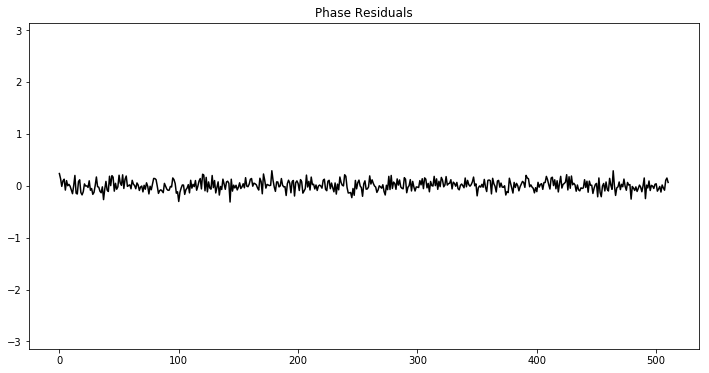

----------------------------

Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.5)


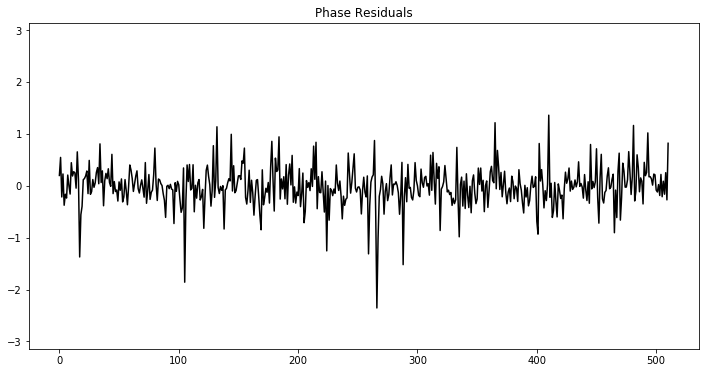

----------------------------

Constructed 512x512 matrix, Completeness: 23.61% (noise = 0.1)


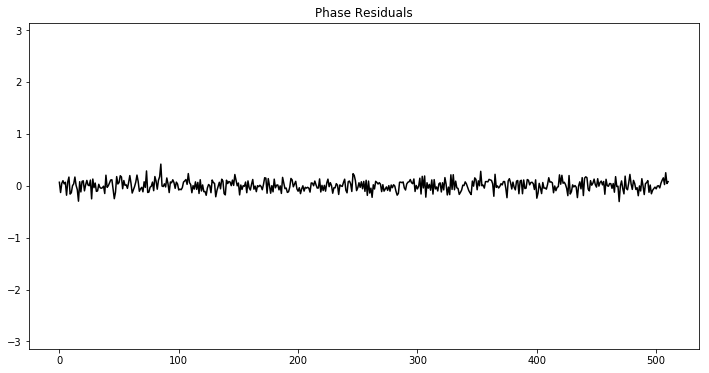

In [14]:
# Test Matrix sizes, and completeness factors
def test_solve(N, incomplete, noise):
    test_M, test_goal = create_noisy_and_incomplete_M(N, incomplete, noise)
    sol_s = diag_solve_M_simple(test_M)
    res_s = angle(exp(1j * (sol_s - test_goal)))
    comp = sum(logical_not(isnan(test_M)))/N/N
    print("\nConstructed {0}x{0} matrix, Completeness: {1:.2f}% (noise = {2})".format(N, comp*100, noise))
    return res_s


res_s = test_solve(512, 32, 0.1)
figure(figsize=(12,6))
plot(res_s, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res_s = test_solve(512, 32, 0.5)
figure(figsize=(12,6))
plot(res_s, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res_s = test_solve(512, 64, 0.1)
figure(figsize=(12,6))
plot(res_s, 'k-')
ylim(-pi, pi)
title('Phase Residuals')
show()

**Huh, spikes don't occur for the simple method!**

The simple method performs quite well, surprisingly. Perhaps, the complex method would do better if implemented properly.

However, the noise in the eigenvector method is much lower. We can use the simple method to check which phases in the eigenvector method are misbehaving and replace them from those in the simple method.

## Combined Method

We use the **subdiagonal method** to determine which phases determined by the **eigenvector method** are terribly determined and must be replaced by those determined by the subdiagonal method.

The `bad_phases` list is also returned by the function in case, better methods of determining phases (such as interpolation) can be used later.


Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.1)


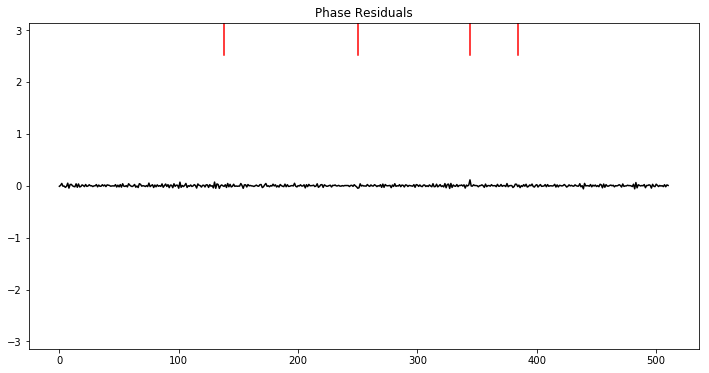

----------------------------

Constructed 512x512 matrix, Completeness: 12.29% (noise = 0.5)


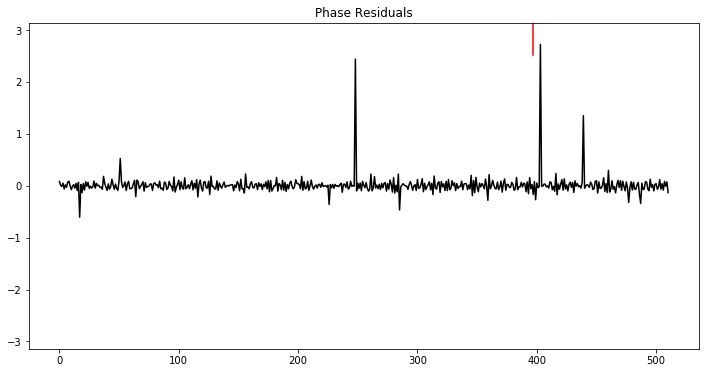

----------------------------

Constructed 512x512 matrix, Completeness: 2.14% (noise = 0.1)


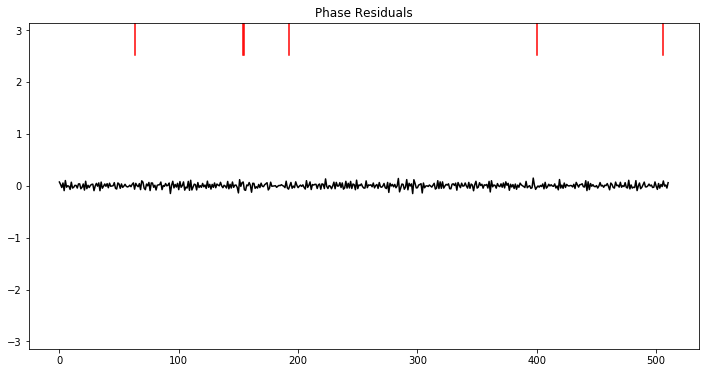

----------------------------

Constructed 4096x4096 matrix, Completeness: 1.97% (noise = 0.1)


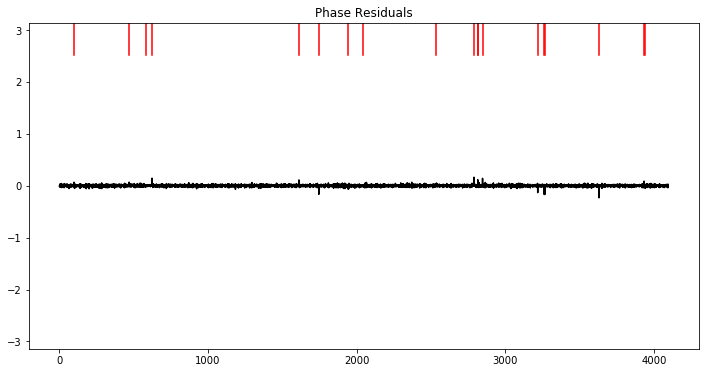

In [15]:
# Test Matrix sizes, and completeness factors
def test_solve(N, incomplete, noise, print_flag=True):
    test_M, test_goal = create_noisy_and_incomplete_M(N, incomplete, noise)
    sol_e = eigen_solve_M(test_M)
    sol_s = diag_solve_M_simple(test_M)
    
    res_e = angle(exp(1j * (sol_e - test_goal)))
    res_s = angle(exp(1j * (sol_s - test_goal)))
    
    bad_phases = logical_or(res_e > np.max(res_s), res_e < np.min(res_s))
    sol = np.copy(sol_e)
    sol[bad_phases] = sol_s[bad_phases]
    res = angle(exp(1j * (sol - test_goal)))
    
    comp = sum(logical_not(isnan(test_M)))/N/N
    if print_flag:
        print("\nConstructed {0}x{0} matrix, Completeness: {1:.2f}% (noise = {2})".format(N, comp*100, noise))
    return res, np.arange(len(res))[bad_phases]

res, bad = test_solve(512, 32, 0.1)
figure(figsize=(12,6))
plot(res, 'k-')
for bad_phase in bad:
    axvline(x=bad_phase, ymin=0.9, color='r')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res, bad = test_solve(512, 32, 0.5)
figure(figsize=(12,6))
plot(res, 'k-')
for bad_phase in bad:
    axvline(x=bad_phase, ymin=0.9, color='r')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res, bad = test_solve(512, 5, 0.1)
figure(figsize=(12,6))
plot(res, 'k-')
for bad_phase in bad:
    axvline(x=bad_phase, ymin=0.9, color='r')
ylim(-pi, pi)
title('Phase Residuals')
show()

print("----------------------------")

res, bad = test_solve(4096, 40, 0.1)
figure(figsize=(12,6))
plot(res, 'k-')
for bad_phase in bad:
    axvline(x=bad_phase, ymin=0.9, color='r')
ylim(-pi, pi)
title('Phase Residuals')
show()

### The combined method works decently. The red lines on the top of the plots denote which phases were tagged as `bad` and replaced. However, high noise makes the method much less effective.

#### In our actual application, we expect a completeness percentage of 2%. So the last plot is a fair simulation of what that will be like. However, the expected amount of noise in our application has not been measured, and so 0.1 was used.

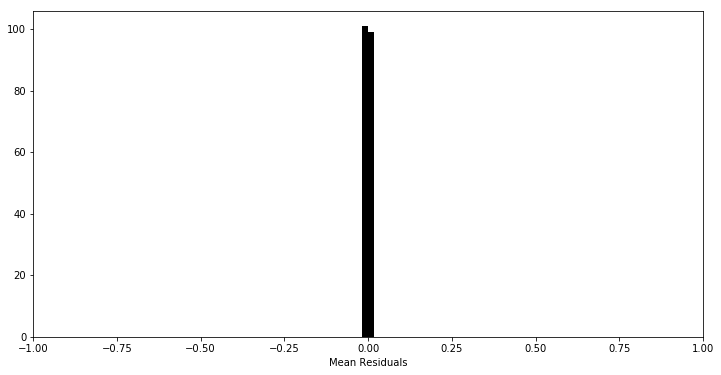

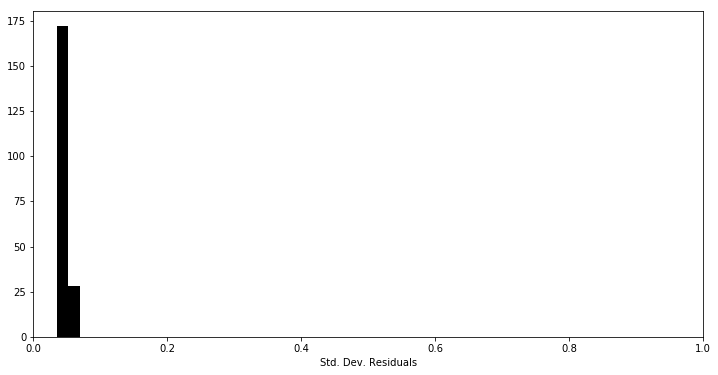

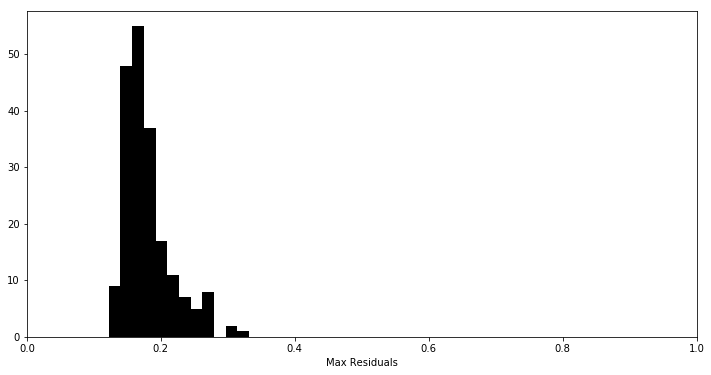

In [16]:
def batch_solve(num_tests):
    mean_res = np.zeros(num_tests)
    std_res = np.zeros(num_tests)
    max_res = np.zeros(num_tests)
    for i in range(num_tests):
        res, _ = test_solve(512, 5, 0.1, print_flag=False)
        mean_res[i] = mean(res)
        std_res[i] = std(res)
        max_res[i] = np.max(abs(res))
    
    return mean_res, std_res, max_res

mean_res, std_res, max_res = batch_solve(200)

figure(figsize=(12,6))
hist(mean_res, range=(-pi, pi), bins=360, color='k')
xlim(-1, 1)
xlabel('Mean Residuals')
show()

figure(figsize=(12,6))
hist(std_res, range=(0, pi), bins=180, color='k')
xlim(0, 1)
xlabel('Std. Dev. Residuals')
show()

figure(figsize=(12,6))
hist(max_res, range=(0, pi), bins=180, color='k')
xlim(0, 1)
xlabel('Max Residuals')
show()

### Running 200 tests of the method with 512 phases, 2% completeness, 0.1 noise to generate a histogram of results. The methods are quite stable, and the worst determined phases are easily determined to better than $\pi/10$